# Introduction

This is a book that builds itself. Some parts are provided for you.  Some parts you will fill in. It is also an experiment. It is composed of markdown cells (like this one) that contain static content, and

In [1]:
# of code cells (like this one) that can be executed to produce outputs.
# for example:
2+2

4

Both types of cells can be executed by selecting the cell and hitting Shit+Enter or by selecting the cell and clicking the 'Run' button in the menu bar.  Execution of markdown cells will typeset any rich content, but otherwise leave the cell unchanged.  Execution of code cells may produce new content. Markdown cells may be edited by double-clicking or hitting enter when they are selected. You can perform bulk operations on all cells in a given notebook via the Jupyter 'Cell' (JupyterLab 'Run') and 'Kernel' menus. In particular, the 'Run All' (in the Cell/Run menu) and 'Restart and Run All' (in the Kernel menu) options may prove particularly useful.  Restarting the Kernel means clearing all defined variables and essentially starting from a clean slate.  Every notebook will start with a code cell (like the one coming up next) that will load a bunch of useful stuff that helps build the rest of the book.  We will gradually explore all of the things being loaded, but for now, just assume that you need to run these cells so that everything else will work.

In [2]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()
# Run it! Run it now!

#this is temporary and will be removed once ipython fixes the upstream bug
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)
init_printing()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{\ensuremath{\vphantom{C}^{\mathcal{#1}}\!{\dot C^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# Classical Mechanics and Vectors

This is a book about Newtonian, or classical, mechanics. Since the early 20th century, thanks to the efforts of Josiah Willard Gibbs, the standard tools for studying classical mechanics are vector algebra and vector calculus.  The language of vectors is particularly well suited for this study because of the nature of Newton's laws. Let's remind ourselves of what these are: 
1. <span style="font-family: 'Brush Script MT', cursive; font-size: 2em">Corpus omne perseverare in statu suo quiescendi vel movendi uniformiter in directum, nisi quatenus a viribus impressis cogitur statum illum mutare</span><br> Every body preserves in its state of rest, or of uniform motion in a right line, unless it is compelled to change that state by forces impressed thereon
2. <span style="font-family: 'Brush Script MT', cursive; font-size: 2em">Mutationem motus proportionalem esse vi motrici impressae; et fieri secundum lineam rectam qua vis illa imprimitur</span><br>
The alteration of motion is ever proportional to the motive force impressed; and is made in the direction of the right line in which that force is impressed
3.<span style="font-family: 'Brush Script MT', cursive; font-size: 2em">Actioni contrariam semper et aequalem esse reactionem: sive corporum duorum actiones in se mutuo semper esse aequales et in partes contrarias dirigi</span><br>
To every action there is always opposed an equal reaction; or the mutual actions of two bodies upon each other are always equal, and directed to contrary parts

The key here is in the second law: "proportional...in the direction".  This law is describing a quantity that has **magnitude** and **direction**.  Mathematically, this type of object is a **vector**.  Because we live in a 3-dimensional universe (don't listen to what the physicists say - our daily perception of the world is strictly spatially 3D), the particular types of vectors we're interested in are called **Euclidean** or **geometric** vectors.  So, before we do anything else, we have to lay down some basic formalism about these objects.


# Vectors and Vector Spaces

A vector is an element of a vector space.  Great! What's a vector space?  A vector space is a collection of vectors. ...   This definition does not seem to be at all helpful, but such seemingly (and in many cases, actually) circular definitions are how we build up a lot of mathematical formalism.  The key is to make the mathematical system self-consistent (and then, if we wish to use it for describing the physical world, to demonstrate that it applies to our model of the world).

So, let's try again, with a bit more formality.  
<div class="alert alert-block alert-info">
    A <b>vector space</b> ($V$) is a collection of vectors ($\mf a, \mf b, \mf c \ldots \in V$) over a <b>field</b> of <b>scalars</b> ($x, y, z, \ldots \in \mc F$), with two operators: <b>vector addition</b>
    and <b>scalar multiplication</b>.
</div>

Phew.  A lot just happened in that little blue box (almost like its bigger on the inside). Like, we're going to have to back up and provide ourselves with a bunch of additional definitions before we can move forward with this one.  That's ok, we just need to keep things straight. Simple things first: notation.

- We will always typset scalars as unbolded, lowercase letters: $x,y,z$, etc.
- We will always typset vectors as bolded, lowercase letters: $\mf a, \mf b, \mf c$, etc.
- $\ldots$ means there's more of a set (or collection of things) we're not writing out explicitly.
- $\in$ means 'in', as in, this thing or things to the left of the symbol are part of the collection or set or whatever to the right of the symbol.
- $\forall$ means 'for all'. We haven't used this one yet, but will shortly.
- $\exists$ means 'there exists'.  We haven't used this one either, but will in a little bit.
- s.t. means 'such that'. We haven't used this one...you get the idea.
- $\equiv$ means 'equivalent to' and $\triangleq$ means 'defined as'.

A **scalar** is a quantity that has only **magnitude**. It measures how much of something there is.  Whenever you hear scalar, you can just think 'number'.  A scalar can be an integer, it can be a real number, a complex number, and lots of other things.  The most general description of a scalar (just like our description above of a vector) is that it is an element of a **set** (a collection) of scalars, called a **field**.  

<div class="alert alert-block alert-info">
    A <b>field</b> ($\mc F$) is a set of scalars ($x, y, z, \ldots \in \mc F$), with two operators: <b>addition</b> and <b>multiplication</b>.
</div>

Both of these operators are formally **binary** operators - that is, they take two elements from the field, and produce a third (possibly different) element of that field. The standard way of expressing this looks something like $\mc F \times \mc F \rightarrow \mc F$.  The $\times$ symbol here represents either operator. Notationally, we will represent addition using the plus symbol (+) and multiplication by simply writing two scalars next to each other (i.e. $xy$ means $x$ multiplied by $y$).

You are undoubtedly already familiar with multiplication and addition, but the operators here are a bit more general than the arithmetic ones we use day to day.  In fact, they are not even strictly defined.  Rather, these two operators are literally anything that obeys a specific set of rules, called **field axioms**. 

<div class="alert alert-block alert-info">
    <b>Field Axioms</b><br>
    <ol>
        <li>Addition and multiplication are both <b>associative</b>:<br> $\forall x,y,z \in \mc F \quad x + (y + z) = (x + y) + z$ and $x(yz) = (xy)z$.  </li>
        <li>Addition and multiplication are both <b>commutative</b>:<br> $\forall x,y,z \in \mc F \quad  x + y = y + x$ and $xy = yx$.  </li>
        <li>Every field contains two special elements, which we call 0 and 1.  0 is special because $x + 0 = x \,\,\forall x \in \mc F$, and 1 is special because $1x = x \,\, \forall x \in \mc F$.  0 is called the <b>additive identity</b> element and 1 is called the <b>multiplicative identity</b> element.</li>
        <li>The existence of the identity elements requires the existence of <b>inverses</b>.  The <b>additive inverse</b> of $x$ is $-x$. Formally, $\forall x \in \mc F \quad \exists -x \quad \mathrm {s.t.}\quad x + -x = 0$<br>
            The <b> multiplicative inverse</b> of $x$ is $x^{-1}$.  Formally, $\forall x \in \mc F \quad \exists x^{-1} \quad \mathrm {s.t.}\quad xx^{-1} = 1$
        </li>
        <li> Finally, addition is <b>distributive</b> over multiplication:<br> $\forall x,y,z \in \mc F \quad x (y + z) = xy + xz$   </li>
    </ol>
</div>

Notice that all of these axioms match our understanding of the arithmetic addition and multiplication operators that we apply to real numbers.  The existence of the inverses explains why we only need two operators instead of the four we are taught in school.  Subtraction is just addition of the additive inverse of a number, while division is just multiplication by the multiplicative inverse of any number.  Positing these operators as anything following these rules gives us a lot of flexibility, and allows for the consideration of other fields in addition to the real numbers.  In the study of dynamics, the two most important fields are the **real** numbers, denoted by $\mb R$ and the **complex** numbers, denoted by $\mb C$.  

Real numbers include absolutely any single number along the infinite number line, stretching from negative to positive infinity.  They include integers, rational numbers (ratios of integers) irrational numbers (things that cannot be expressed as ratios of integers, like $\sqrt{3}$), transcendental numbers like $\pi$, and so on.  The only thing not included in the set of reals are the imaginary numbers, which are any number that is a multiple of the square root of a negative ($i \triangleq \sqrt{-1}$). 

<div class="alert alert-block alert-danger">
There exists a much, much more precise and complete definition of the real numbers.  For our purposes, we don't really need it, but if you are a mathematical completist (and why shouldn't you be?) note that this isn't the end of the story.
</div>

Complex numbers are pairs of real numbers, with a single complex number defined as $x + iy$ for $x,y \in \mb R$. The addition and multiplication operators have to be a bit different for complex numbers.

<div class="alert alert-block alert-info">
If $c_1 = x + iy$ and $c_2 = u + iv$, then $c_1 + c_2 \triangleq (x+u) + i(y+v)$ and $c_1c_2 \triangleq (xu-yv) + i(xv+yu)$.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Prove that the definitions of addition and multiplication of complex numbers obey all relevant field axioms.
</div>


<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Identify the additive and multiplicative inverses and identity elements of the field of complex numbers.
</div>

All right. Back to vectors.  Remember vectors?  This is a section about vectors.  Vectors are elements of vector spaces, and we are now (finally) ready to fully state the definition of a vector space.

<div class="alert alert-block alert-info">
    A <b>vector space</b> ($V$) is a collection of vectors ($\mf a, \mf b, \mf c \ldots \in V$) over a <b>field</b> of <b>scalars</b> ($x, y, z, \ldots \in \mc F$), with two operators: <b>vector addition</b> and <b>scalar multiplication</b> with the following properties:<br> 
<ol>
<li> Commutativity of vector addition: $\forall \mf a, \mf b \in V: \mf a+ \mf b = \mf b + \mf a$</li>
<li> Associativity of vector addition: $\forall \mf a, \mf b,\mf c \in V: (\mf a + \mf b) + \mf c =\mf a + (\mf b + \mf c)$</li>
<li> Identity element of vector addition: $\exists \mf 0 \in V \textrm{ s.t. } \mf a + \mf 0 = \mf a \,\, \forall \mf a \in V$</li>
<li> Inverse elements of vector addition: $\forall \mf a \in V \,\exists \mf{-a} \in V \textrm{ s.t. } \mf a + (\mf{-a}) = \mf 0$</li>
<li> Compatibility of scalar multiplication: $\forall x,y \in \mc F, \, \mf a \in V: x(y\mf a) = (xy)\mf a$</li>
<li> Distributivity of scalar multiplication over vector addition: $\forall x \in \mc F, \, \mf a,\mf b \in V: x(\mf a + \mf b) = x\mf a + x\mf b$</li>
<li> Distributivity of scalar multiplication over scalar addition: $\forall x,y \in \mc F, \, \mf a \in V: (x+y)\mf a = x\mf a + y\mf a$</li>
<li>  Identity element of scalar multiplication: $\exists 1 \in \mc F \textrm{ s.t. } 1\mf a = \mf a \,\, \forall \mf a \in V$</li>
</ol>
</div>

Key point: the vector space definition does **not** include a vector multiplication operator.  We can actually define multiple such operators, and they will each be useful in different ways, but we will have to do a bit more work to get to them.

# Euclidean (Geometric) Vectors

A Euclidean vector has a magnitude and a direction. We can think of a geometric position vector as pointing from a point $A$ to a point $B$ in 3D space.  We will call this vector $\mf r_{B/A}$ (when spoken, we would say: "r B rel A"). The notation is intended to convey the idea of something pointing from the second subscript to the first subscript, or the idea that we are defining the position of $B$ relative to $A$. 

<div class="alert alert-block alert-danger">
Here's a thing: don't get hung up on notation.  Notation is there to help you, and not to be an extra cognitive burden.  We're going to be using some pretty ornate notation, which some people find onerous and inefficient.  I think it helps prevent mistakes.  You should develop a notation that makes sense to you, and then use it consistently.  One demand that you should make of your notational system is that you can always distinguish between a vector and a scalar.
</div>

<p style="text-align:center;"><img src="img/euclidean_vectors.png" alt="Euclidean Vectors"  id="fig:eucvec"/></p>

The position vector $\mathbf r_{B/A}$ has a magnitude of the distance between points A and B and a direction pointing from A to B. The magnitude of a vector is given by the norm operator, as in $\Vert \mathbf r_{B/A} \Vert$. This operation returns a *positive* scalar value.  The direction of a vector is given by its unit vector.  A unit vector is a vector with magnitude 1 --- a pure direction.  We denote it by putting a hat over a vector, such as $\bhat{r}_{B/A}$.  Thus, you can always decompose a vector into the product of its magnitude and direction as: 
<div class="alert alert-block alert-info">
    $$ \mf r_{B/A} = \Vert \mathbf r_{B/A} \Vert\bhat{r}_{B/A}$$
</div>
You can flip the direction of a vector by flipping the sign of its unit vector, which, in our notation, would flip the order of my subscripts:
<div class="alert alert-block alert-info">
$$ \mf r_{A/B} = - \mf r_{B/A} $$
   </div>
This is an expression of the existence of inverse elements.

Geometric vectors are elements of the Euclidean (geometric) vector space (typically denoted by $\mb R^3$) and therefore have vector addition and scalar multiplication operators.  Our notation helps with vector sums: if the interior indices of an addition match, they cancel out. So, for example:
<div class="alert alert-block alert-info">
$$ \mf r_{C/B} + \mf r_{B/A} = \mf r_{C/A}$$
</div>
Inspecting the <a href="#fig:eucvec">figure</a> above, there's also a completely intuitive interpretation of this addition: traveling from $A$ to $B$ and then from $B$ to $C$ is the same as traveling from $A$ to $C$. Vector subtraction is understood via the additive inverse. We've already seen that flipping the direction of a vector (i.e., finding its additive inverse) flips the order of the subscripts.  We can use this to carry out subtraction operations:
$$ \mf r_{C/A} - \mf r_{B/A} = \mf r_{C/A} + (-\mf r_{B/A}) = \mf r_{C/A} + \mf r_{A/B} = \mf r_{C/B}$$
Again, our intuitive understanding of what's happening is something like: going from $A to C$ and then backtracking from $B$ to $A$ is the same as going from $B$ to $A$.  There might be some confusion at this point, since if you draw out the words in the previous sentence you would end up at a point above $A$, at a height equal to $C$'s height above $B$.  That's ok - remember, a vector is a magnitude and direction --- the connecting two points in space is just a helpful way to think about it, but not its intrinsic definition.  Thus, if I draw a vector above $A$ that has the exact same direction and magnitude as $\mf r_{C/B}$, then I've basically drawn $\mf r_{C/B}$.  Hold on to this idea - we're going to use it again in a little bit.

Finally, scalar multiplication should be interpreted as a change in vector magnitude with no change in direction.  Mathematically, we can interpret this via the compatibility of scalar multiplication:
<div class="alert alert-block alert-info">
$$ x \mf r_{B/A} = x\left(\Vert \mathbf r_{B/A} \Vert\bhat{r}_{B/A}\right) = \left(x\Vert \mathbf r_{B/A} \Vert\right)\bhat{r}_{B/A}$$
    </div>
The unit vector (and thus the direction) remains the same while the magnitude is scaled by the scalar multiplier. 

# Vector Space Basis and Reference Frames

The **basis** of a vector space is a **linearly independent** set of vectors **spanning** the vector space.

<div class="alert alert-block alert-info">
    Define a set $S = \{\mf v_1, \mf v_2, \ldots, \mf v_n\}$ for $\mf v_i \in V$ where $V$ is a vector space over a field $\mc F$.<br><br>
    $S$ is <b>linearly independent</b> if $\displaystyle \sum_i a_i \mf v_i = 0 \Leftrightarrow a_i \equiv 0 \,\, \forall i, a_i \in \mc F$ <br>
    $S$ <b>spans</b> $V$ if $\exists \, a_i \in \mc F$ such that $\displaystyle \mf b  = \sum_i a_i \mf v_i \,\, \forall \mf b \in V$
</div>

What does any of this even mean?  The spanning part means that we can grab a subset of vectors from our vector space, and then express **every other vector in the space** as a linear combination of this set.  The fact that the set is itself linearly independent means that no element of the set can be replaced by a combination of the others.  Thus, a basis is a *minimal* spanning set, and represents the most efficient encoding of the vector space.  A key observation here is that basis sets are **not** unique: you can define an infinite number of equally valid basis sets for any vector space.

Ok, that's kind of cool and all, but what does this have to do with dynamics?  A basis of a Euclidean space is a **reference frame**!
<p style="text-align:center;"><img src="img/reference_frame.png" alt="Reference Frame" width="350" id="fig:refframe"/></p>


A reference frame is how we measure space.  It can be thought of as a rigid structure, and, in fact, every rigid body is equivalent to a reference frame (much more on this much later). Because we are trying to span the $\mb R^3$ vector space, we need three basis elements. We won't go into the proof of this here, but take it as a postulate. Multiple proofs of this assertion are possible, but require setting up some additional mathematical machinery that we won't really need. The three basis elements are linearly independent unit vectors, which makes them mutually orthogonal.  We'll get to an exact definition of orthogonality in a little bit, but conceptually, this means that each of the unit vectors defining the reference frame is rotated exactly 90 degrees from the other two, as in the <a href="#fig:refframe" >figure</a> above. 

### Vector Components
Let's recall the utility of a basis set: it allows us to encode all elements of a vector space as weighted sums of elements of the basis, and this is exactly what a reference frame does for us.  By defining a reference frame, we can write any geometric vector as a sum of its **components**. So, as in the <a href="#fig:refframe" >figure</a>, once you have defined a reference frame $\mc I$ with mutually orthogonal unit directions $\bhat e_1, \bhat e_2, \bhat e_3$, the position of point $P$ with respect to point $O$ can be expressed as the weighted sum:
$$\mf r_{P/O} = x_1 \bhat{e}_1 +  x_2 \bhat{e}_2 + x_3 \bhat{e}_3$$
The component weights ($x_1$, $x_2$, and $x_3$) are sometimes referred to as the **measure numbers** of the vector in the particular reference frame being used. 

At some point in your life, someone may have told you that a geometric vector was a list (or array) of three scalar values.  That person was lying to you.  You should find them, and make them ashamed.  The array of three scalars represents the components of a vector in a particular reference frames.  Euclidean vectors by themselves are purely geometric objects - they exist and are fully defined in the absence of any reference frame definition.  However, once we have defined a reference frame, it is frequently convenient to express our vectors in its components.  When we do this, we must be careful to never lose sight of which frame (or frames) we're working with.  One notational solution would be to always write out the full summation including the unit vectors, as in the equation above, but this is cumbersome.  Instead, we'll introduce a new notational convention to help us along. For any vector $\mf r$, we will denote its components in a frame $\mc I$ as $\left[\mf r \right]_\mc I$.  The square brackets remind us that the component representation is a list of scalars, which we choose (for reasons that will become clearer momentarily) to describe as an array.  The right subscript reminds us of the frame these components belong to.

So, with this new notation, the previous equation becomes:
$$\left[\mf r_{P/O} \right]_\mc I = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}_\mc I$$
Notice two things: first, there is an implicit order of the frame unit vectors (such that the component $x_1$ corresponds to direction $\bhat{e}_1$, etc.).  This means that it is crucial to state your frame unit vector order when you define it.  In this case, we can state that $\mc I= \left(\bhat{e}_1, \bhat{e}_2, \bhat{e}_3\right)$. Second, note that we have written the component array as a column matrix (as opposed to a row matrix). Our convention will be to *always* express component arrays as column matrices (again, there's a specific reason for this that will be revealed in a little bit). 

In [3]:
# oh wow. we've reached our first real code block.  I'm really excited.
# we're going to introduce the mat2vec command.  This is just a utility 
# for converting matrices of components into vector expressions in our notation
# you can always get information about a method by using the ? command.
# here - try it out (hit Shift+Enter or click Run):
mat2vec?
#cool, huh?

Signature: mat2vec(mat, basis='e')
Docstring:
Transform matrix representation of a vector to the vector equation
for a given basis.

Args:
    mat (sympy.Matrix)
        3-element column matrix representing the components of a geometric vector
    basis (str or iterable of strings of length 3)
        If basis is a string, it is used to generate a standard basis-like notation.
        For example, the default (basis = 'e') results in a basis set of:
        '\mathbf{\hat{e}}_1, \mathbf{\hat{e}}_2, \mathbf{\hat{e}}_3'
        If basis is an iterable, then the contents are used exactly to represent the
        basis vectors.

Returns:
    sympy.Add:
        The full vector in the specified basis (reference frame).
File:      ~/Documents/gitrepos/astrodynamicsbook/astrodynamicsbook/bookhelpers.py
Type:      function


In [4]:
# ok, now let's try to reproduce what we saw above.
# we'll use the Matrix command to create a matrix of components, 
# which we'll first define as symbols, and then mat2vec them into 
# our reference frame
x1,x2,x3 = symbols('x_1,x_2,x_3') 
# notice that the variable names don't have to match their string definitions
r_PO_I = Matrix([x1,x2,x3])
# for code, we'll use a flattened notation that mimics the mathmode one, but omits
# brackets and other such stuff
mat2vec(r_PO_I)

Aaaahhhh. did you see that? It worked, it worked! 

<div class="alert alert-block alert-danger">
    You might have noticed that our code outputs place the unit vector first and scalar part second in each term.  This is a result of how sympy chooses to order its symbols, which is behavior that is quite hard to override.  However, it's not a problem, since vectors commute with their scalar multipliers, and so the ordering of these terms makes absolutely no difference.
</div>


Your turn.  Show me the same thing,
but with $\mf r_{P/O} = (a+b) \bhat{e}_1 +  (b+c) \bhat{e}_2 + (c+d) \bhat{e}_3$.  How about $\mf r_{P/O} = x \bhat{i} +  y \bhat{j} + z \bhat{k}$?

In [5]:
# this space for you to play with mat2vec. You will need to define some additional 
# symbols and possibly look at the docstring (mat2vec?, above) again.
# A good approach would be to copy/paste the contents of the previous code block
# and make edits.



<div class="alert alert-block alert-danger">
Remember how I said not to get hung up on notation?  Yeah, don't.  We'll mostly be using the $\bhat{e}$ with subscript notation for our reference frame components.  If you like $\bhat{i}, \bhat{j}, \bhat{k}$, etc. better, 100% go with that.
</div>

# Coordinate Systems

I hope you had fun with the code block.  Because what's the point of any of this if you aren't having fun?  There were, however, nefarious purposes in mind (gasp) behind that little exercise.  Notice how this exercise had the components of the vector be functions of multiple variables, i.e. $a+c$, $b+c$, etc.? That was actually a sneaky way of getting us into a discussion on coordinates. 

You may have learned at some point in your life, that **coordinate systems** and reference frames were the same thing.  Once again, this is entirely and utterly wrong (you know what to do).  There is a crucial distinction between these two concepts.  Reference frames are basis sets for geometric vectors. The components of a vector in a particular reference frame can be written as *functions* of **coordinates**. Coordinates are therefore scalar quantities that allow us to parametrize how we measure the systems we are analyzing. In **analytical mechanics** (which is just classical mechanics, but fancier), we use **generalized coordinates**.  Generalized coordinates are just that - a complete generalization of the concept of coordinate systems.  We'll touch on this concept briefly here, and then come back to it much later.  Assume that we have a set of generalized coordinates, that we will call $q_1, q_2, q_3, \ldots q_n$ (that is, we have $n$ distinct generalized coordinates).  Assume also that we have some position vector, $\mf r$ that is relevant to the analysis of the system for which we defined these generalized coordinates.  Given these two assumptions, what we're really saying is that we can write the components of $\mf r$ in some reference frame $\mc I$ as:
$$\left[\mf r_{P/O} \right]_\mc I = \begin{bmatrix} f_1(q_1, q_2, q_3, \ldots q_n) \\ f_2(q_1, q_2, q_3, \ldots q_n) \\ f_3(q_1, q_2, q_3, \ldots q_n) \end{bmatrix}_\mc I$$
where $f_1, f_2$, and $f_3$ are functions or some or all of the generalized coordinates. 

## Cartesian Coordinates
Ok, that's all fine, but doesn't seem really helpful.  Let's nail down this concept by thinking about specific coordinate systems. The simplest option are the **Cartesian** coordinates (named in honor of René Descartes, who thought about himself a lot). These coordinates correspond 1:1 to the unit vectors of your reference frame.  When we write:
$$\left[\mf r_{P/O} \right]_\mc I = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}_\mc I$$
what we're really saying is that $x_1, x_2, x_3$ are Cartesian coordinates. If we go back to being super pedantic for just a second, the Cartesian coordinates represent the case where $f_1(x_1, x_2, x_3) = x_1$, $f_2(x_1, x_2, x_3) =  x_2$ and $f_3(x_1, x_2, x_3) = x_3$.  Any time you have scalar values that are exactly equal to the measure numbers of components along each of the 3 unit vectors defining a reference frame, you are dealing with Cartesian coordinates.

Let's introduce two more coordinate systems: **cylindrical** coordinates (often called **polar** coordinates when you are working in 2D) and **spherical** coordinates.
<p style="text-align:center;"><img src="img/cylindrical_spherical_coords.png" alt="Cylindrical and Spherical coordinates" width="350" id="fig:cylsphercoords"/></p>

## Polar/Cylindrical Coordinates
Polar/Cylindrical coordinates are useful for tracking radial (circular or closed path) motion in a single plane.  The polar coordinates $\rho, \theta$ map to the Cartesian coordinates as $x = \rho\cos\theta$ and $y = \rho\sin\theta$. Thus, we can write:
<div class="alert alert-block alert-info">
$$\left[\mf r_{P/O} \right]_\mc I = \begin{bmatrix} \rho\cos\theta \\ \rho\sin\theta \\ z \end{bmatrix}_\mc I$$
</div>

$\theta$ is an **azimuth** angle: it measures the rotation of the position vector in the plane defined by the first two unit directions of our reference frame (i.e., the $\bhat{e}_1-\bhat{e}_2$ plane).

## Spherical Coordinates
The spherical coordinates $(r,\theta,\phi)$ allow us to write the components of our position vector as:
<div class="alert alert-block alert-info">
$$\left[ \mf{r}_{P/O} \right]_\mc I = r\begin{bmatrix}
\cos\theta \sin\phi \\ \sin\theta\sin\phi \\ \cos\phi \end{bmatrix}_\mc I$$
</div>

Here, $\phi$ is the **zenith** or **polar** angle.  Zenith is the direction directly above a given location (and nadir is the point below).  The complement to the zenith angle (i.e., $\frac{\pi}{2} - \phi$) is known as the **elevation** angle.

Notice that we have made a distinction between the polar coordinate radius ($\rho$) and spherical coordinate radius $r$.  These are two very different quantities.  The spherical radius $r$ is the magnitude of the position vector.  The polar radius $\rho$, on the other hand, is the **projection** of the spherical radius onto the $\bhat{e}_1-\bhat{e}_2$ plane.  We're not quite ready to formally define projection, but we will, in just a little bit. The intuitive understanding of projection can be seen in the <a href="#fig:cylsphercoords" >figure</a>, above: if we split $\mf r_{P/O}$ into two vectors, one of which lies in the $\bhat{e}_1-\bhat{e}_2$ plane and one of which is orthogonal to that plane, then $r$ will be the magnitude of the vector that's in the $\bhat{e}_1-\bhat{e}_2$ plane.

<div class="alert alert-block alert-danger">
Here's a thing: mathematicians and physicists suck.  We fundamentally cannot agree on a single, universal, spherical coordinate definition.  So, you will find some references using $\theta$ as an azimuth angle and some using $\phi$ as an azimuth. Some references will define spherical coordinates as we have here, using an azimuth and zenith angle, while others will use an azimuth and an elevation.  If you think this is all needlessly confusing, you are 100% correct. For the remainder of this text, whenever we talk about spherical coordinates in general, we will be assuming the definition given above.  However, occasionally we will bring up specific, named, spherical coordinate systems, and many of these will use elevation angles.  Whenever this happens, we will make a specific note of it.
</div>

An incredibly important thing has happened here (did you spot it?).  We have written the components of the same vector ($\mf r_{P/O}$) in the same reference frame ($\mc I$) in three completely different ways.  The key takeaway is that every reference frame can have an *infinite* number of coordinate systems associated with them.  Remember: reference frames tell us how to decompose space into three directions.  Coordinate systems tell us how to go about evaluating the components of a vector in a particular reference frames.  They work together, but serve different functions.  

Because these concepts are so closely linked, it is actually useful to expand our reference frame nomenclature slightly, and, when defining a reference frame, to also include a coordinate system origin.  Note that there is absolutely no requirement to do so - a reference frame is fully defined without any coordinate system definitions, and consists solely of three unit vectors, but, in practice, we will almost always wish to associate coordinates with our reference frames, and these coordinates must be defined as being measured *from* somewhere - hence the coordinate system origin.  Notationally, we represent this by adding a point to our reference frame definition.  Thus, for the frame $\mc I$ depicted in the <a href="#fig:cylsphercoords" >figure</a>, we would write: $\mc I = \left(O, \bhat{e}_1, \bhat{e}_2, \bhat{e}_3\right)$, which tells us that the Cartesian coordinates associated with this frame all equal zero at point $O$.

The Cartesian, Cylindrical, and Spherical coordinates are by no means the only standard coordinate systems available to us, but they are, by far, the most ubiquitous and the ones we will turn to most often.

## Standard Basis
At this point, it is also worthwhile to consider the representation of the unit vectors defining a frame in components of *that same frame*.  Let's continue with our frame $\mc I = \left(O, \bhat{e}_1, \bhat{e}_2, \bhat{e}_3\right)$, and consider the components of the $\bhat{e}_1$ unit vector, i.e., $\left[\bhat{e}_1 \right]_{\mc I}.$ We are looking for something with magnitude 1, that has a direction entirely in the first unit direction of the $\mc I$ frame.  

Thus,$\left[\bhat{e}_1 \right]_{\mc I} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}_\mc I$  and similarly, $\left[\bhat{e}_2 \right]_{\mc I} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}_\mc I$ and $\left[\bhat{e}_3 \right]_{\mc I} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}_\mc I$

This set of 3 column matrices is often referred to as the **standard basis**.

Let's check whether our mathematical and computational formalism is self-consistent so far:

In [6]:
# Define the components of the standard basis
e_1 = Matrix([1,0,0])
e_2 = Matrix([0,1,0])
e_3 = Matrix([0,0,1])
# Convert them back to vector notation
mat2vec(e_1), mat2vec(e_2), mat2vec(e_3)

So far, so good.

# Vector Products

Recall that our definition of vectors (as elements of a vector space) carried with it the definition of a vector addition operator and scalar multiplication operator, but no vector multiplication operator.  Part of the reason for this is that no such operator required for the vector space definition to work, but also, because there's not one unique operator (or even class of operators) that you can call vector multiplication.  There are at least three different types of operator that can all equivalently be termed vector multiplication, and each of them produces an entirely different *kind* of result.  We will now discuss each of these, in turn.

## (Scalar) Dot Product

The **dot product**, sometimes called a **scalar dot product** or **scalar product** is an operation on two vectors returning a scalar (i.e., $V \times V \rightarrow \mc F$ for vector space $V$ defined over field $\mc F$).  Formally, it is an **inner product** for the Euclidean vector space. Inner products are additional operators that can be defined for vector spaces (making them into inner product spaces) that are defined (much like vector addition) by their required properties.   Here, we will list the relevant properties of the scalar dot product of the Euclidean vector space defined over the field of real numbers, which are a subset of the full inner product definition. 

<div class="alert alert-block alert-info">
    Given geometric vectors $\mf a, \mf b, \mf c$, and scalars $x,y$, the scalar dot product is:<br>
<ol>
    <li> Commutative: $\mf a \cdot \mf b = \mf b \cdot  \mf a$</li>
    <li> Distributive over vector addition: $\mf a \cdot (\mf b+ \mf c) = \mf a \cdot \mf b + \mf a \cdot \mf c$</li>
    <li> Compatible with scalar multiplication: $x\mf a \cdot y\mf b = xy(\mf a \cdot \mf b)$</li>
</ol>
</div>

The dot product also gives us our first formal definition of orthogonality.  Two vectors $\mf a$ and $\mf b$ are mutually orthogonal if and only if $\mf a \cdot \mf b = 0$. 'If and only if' (iff) is one of the strongest statements you can make in mathematics. It defines a bi-directional relationship, such that each half of the statement requires the other.  That is to say, if you have two vectors whose dot product equals zero, then they are necessarily orthogonal to one another, and stating that two vectors are orthogonal equivalently means that their dot product is zero. 

<p style="text-align:center;"><img src="img/dot_product.png" alt="Scalar Dot Product" width="350" id="fig:dotproduct"/></p>

There is also a purely geometric interpretation of the dot product, as illustrated in the <a href="#fig:dotproduct" >figure</a>, above. Recall our visualization of Euclidean vectors as joining two points in space.  Recall also our previous discussion that any two vectors with the same magnitude and direction are effectively the same vector.  This means that we can always represent two vectors as being co-originating, as in the <a href="#fig:dotproduct" >figure</a>.  That is to say, if we have a vector joining points $A$ and $B$, and another vector joining points $C$ and $D$, we can always draw them as two legs of a triangle, as in the <a href="#fig:dotproduct" >figure</a>, so long as we preserve their magnitudes and directions.  From Euclidean geometry, we know that every triangle lies within a plane, and so we are always able to uniquely define an angle between our two vectors, which we shall call $\theta$. Given all this, we can state another definition for the scalar dot product:
<div class="alert alert-block alert-info">
   $$\mf a \cdot \mf b = \Vert \mf a \Vert\Vert \mf b \Vert \cos\theta$$
</div>

If the angle between the two vectors is 90 degrees, then the cosine and the overall dot product evaluate to zero.  In this way, orthogonality of Euclidean vectors is equivalent to the vectors being at a right angle to one another, as we posited earlier.  Yay! We have resolved one of our pending assumptions! Only about eleventy-billion left to go. We now have a working definition of the geometric relationship between the unit vectors forming our reference frames:  if $\bhat{e}_1, \bhat{e}_2, \bhat{e}_3$ form a reference frame, then $\bhat{e}_1 \cdot \bhat{e}_2 = 0$, $\bhat{e}_1 \cdot \bhat{e}_3 = 0$ and $\bhat{e}_2 \cdot \bhat{e}_3 = 0$.

The geometric interpretation of the dot product also nails down the concept of **projection**. The point of a reference frame is that it allows us to decompose any vector into components that measure the parts of the vector that extend in the directions of each of the three unit vectors making up the frame.  If a vector's direction is, for example, entirely in $\bhat{e}_1$, then we would expect that this vector has a non-zero $\bhat{e}_1$ component (with a measure number equal to the vector's magnitude) and zero components in the $\bhat{e}_2$ and $\bhat{e}_3$ directions.  Alternatively, if a vector lies entirely in the $\bhat{e}_2 - \bhat{e}_3$ plane, then we would expect the $\bhat{e}_2$ and $\bhat{e}_3$ components to be non-zero, and the $\bhat{e}_1$ component to be zero.  The process of extracting the component of a vector that lies in a particular direction is the process of projection.  Mathematically, what we are doing when we calculate the components of a vector in the various directions of a reference frame is computing the dot product of the vector with each of those directions.  That is, the $\bhat{e}_1$ component of a vector $\mf r$ is $(\mf r \cdot \bhat{e}_1) \bhat{e}_1$.  More generally, we can write:
<div class="alert alert-block alert-info">
   $$\left[\mf r \right]_\mc I = \begin{bmatrix}\mf r \cdot \bhat{e}_1 \\ \mf r \cdot \bhat{e}_2 \\ \mf r \cdot \bhat{e}_3\end{bmatrix}_\mc I  \quad\mathrm{for}\quad \mc I = (\bhat{e}_1,\bhat{e}_2,\bhat{e}_3)$$ 
</div>

Any vector can be projected onto any other vector (unit or not, defining a frame or not).  The interpretation of the projection of vector $\mf a$ onto vector $\mf b$ is the calculation of the component of $\mf a$ in the direction of $\mf b$. Looking again at the <a href="#fig:dotproduct" >figure</a>, above, we see that the process of projection is geometrically linked to the formation of right triangles.  The part of $\mf a$ that lies in the direction of $\mf b$ (what we call $\bhat{b}$) is equal in magnitude to the base of the right triangle whose hypotenuse is given by $\mf a$ and whose height is the right intersection of a line drawn from the end of $\mf a$ with $\mf b$ (this is why pictures are better - all of these words can be needlessly confusing, but they help nail down exactly what is happening). The magnitude of this base is given by the doc product of $\mf a$ with the direction of $\mf b$: $\mf a \cdot \bhat{b}$. We can similarly project $\mf b$ onto $\mf a$, and the magnitude of this projection will be the length of the base of the right triangle whose height is drawn from the end of $\mf b$ and makes a right intersection with $\mf a$.  The magnitude of this base will be $\mf b \cdot \bhat{a}$. 

Finally, let's consider the case of a vector dotted with itself.  Using the geometric formula given above, we have:
$$\mf a \cdot \mf a = \Vert \mf a \Vert \Vert \mf a \Vert \cos(0) = \Vert \mf a \Vert^2$$
where the zero comes from the fact that a vector is parallel to itself, and therefore the angle separating a vector from itself is zero. This is a very important finding, as it gives us a practical way of computing vector norms (more on this soon).


## (Vector) Cross Product

The **cross product**, sometimes called a **vector dot product** or **vector product** is an operation on two *Euclidean* vectors returning another Euclidean vector (i.e., $V \times V \rightarrow V$ for geometric vector space $V$). Notice that, unlike in our dot product definition, here we are very specific about the fact that it applies only to geometric vectors (i.e., $\mb R^3$).  There is no generalization of the cross product to other vector spaces like the inner product generalization for the dot product.  In fact, the cross product we are about to explore can *only* be defined for $\mb R^3$ and $\mb R^7$.

<div class="alert alert-block alert-danger">
$\mb R^7$, you say.  Where did $\mb R^7$ come from? Don't panic, $\mb R^7$ is just like $\mb R^3$, really, if you have four extra dimensions. Many people struggle to ascribe physical significance to the fact that the operator that we're describing here is only definable in these two vector spaces, one of which appears to map directly to our perception of the physical universe.  It is tempting to want to similarly map $\mb R^7$ to our world, and though there are a few correspondences, they are neither as straightforward nor as useful as the ones we find for $\mb R^3$.  So, basically...don't worry about it.  Treat this as just a quirk of our mathematics, which it most likely is. And for the love of all that is good and holy, do not get dragged into the mess that is the physical interpretation of Octonians. You have been warned.  
</div>

<div class="alert alert-block alert-info">
    Given geometric vectors $\mf a, \mf b, \mf c$, and scalar $x$, the vector cross product is:<br>
<ol>
    <li> Anti-Commutative: $\mf a \times \mf b = -\mf b \cdot  \mf a$</li>
    <li> Distributive over vector addition: $\mf a \times (\mf b+ \mf c) = \mf a \times \mf b + \mf a \times \mf c$</li>
    <li> Compatible with scalar multiplication: $x\mf a \times \mf b = x(\mf a \times \mf b) = \mf a \times x\mf b$</li>
</ol>
</div>

<p style="text-align:center;"><img src="img/cross_product.png" alt="Vector Cross Product" width="400" id="fig:crossproduct"/></p>

Just like the dot product, the cross product has a geometric interpretation:
<div class="alert alert-block alert-info">
 $$\mf a \times \mf b = \Vert \mf a \Vert \Vert \mf b \Vert \sin\theta \mathbf{\hat{c}} \quad\mathrm{where}\quad \mathbf{\hat{c}} \perp \mf a, \mf b$$
</div>

$\perp$ means 'perpendicular to', which we now understand (for geometric vectors) to be equivalent to 'orthogonal to'. So, the cross product of vectors $\mf a$ and $\mf b$ produces a new vector whose magnitude is equal to the product of their magnitudes and the sine of the angle between them, and which points in the direction that is orthogonal to the directions of both vectors. The geometric interpretation of the magnitude of the cross product output is relatively straightforward: $\Vert \mf a \Vert \Vert \mf b \Vert \sin\theta$ is equal to the area of the parallelogram whose edges are defined by $\mf a$ and $\mf b$. Notice that the sine term evaluates to zero for a $\theta$ of $0^\circ$ and $180^\circ$.  This means that if $\mf a$ and $\mf b$ are parallel or anti-parallel, their cross product will be zero.  Similarly, the cross product with itself (or with its own unit direction, or with its additive inverse, or with the direction of its additive inverse) will also be zero.

The direction of the cross-product output is a bit harder.  We start by noting that 'the direction orthogonal to both $\mf a$ and $\mf b$' is not uniquely defined, even in $\mb R^3$ (it is not even remotely uniquely defined in other vector spaces, which is why the cross product operator is itself undefined in those other vector spaces).  Looking at the <a href="#fig:crossproduct" >figure</a>, we see that both $\bhat{c}$ and $-\bhat{c}$ are equivalently orthogonal to both $\mf a$ and $\mf b$.  So, how do we select which direction to use for the output of the cross product?  We need another convention, typically known as the 'right-hand rule'.  $\bhat{c}$ is the direction such that going from $\mf a$ to $\mf b$ represents a counter-clockwise rotation.  In your mind, draw an arc between the ends of $\mf a$ and $\mf b$ in the <a href="#fig:crossproduct" >figure</a>, above.  Follow the arc and note that it is in the counter-clockwise direction.  $\bhat{c}$ points up in the <a href="#fig:crossproduct" >figure</a> because that is how it must be drawn such that we can look *down* this direction and get a counter-clockwise arc from $\mf a$ to $\mf b$.  If we instead were evaluating the cross product $\mf b \times \mf a$, then the same arc would be followed clockwise.  To get it to be in a counter-clockwise direction, we would need to switch our vantage point and be looking at the shaded plane in the <a href="#fig:crossproduct" >figure</a> from below, which would mean switching the direction of $\bhat{c}$, which is essentially encoding our vantage point.  This is a direct geometric encoding of the anti-commutative property of the cross product.

The dot product brought with it a new understanding of orthogonality as well as a way of evaluating vector norms.  The cross product similarly brings something else to the table: the fundamental definition of a reference frame.

<div class="alert alert-block alert-info">
 $$\textrm{If } \mf a \perp \mf b \textrm{ then } \bhat{a}, \bhat b, \bhat a \times \bhat b \textrm{ is a reference frame.}$$
</div>

You see it in the <a href="#fig:crossproduct" >figure</a> above, right?  If $\theta$ is a right (i.e., $90^\circ$ angle, then the directions of $\mf a$, $\mf b$, $\mf c$ would look exactly how we've previously defined reference frames?  And this means that our reference frames follow the right-hand rule convention. 

<div class="alert alert-block alert-danger">
    Pedantic time! Reference frames don't <i>have</i> to follow the right-hand rule.  Those that do are technically called 'dextral' (which is fancy talk (read:latin) for right-handed).  Nothing prevents you from defining a left-handed (or 'sinistral') reference frame.  Yes, 'sinistral' is the same root as 'sinister'.  People <i>really</i> weren't down with the left-handed folk back in the day. We will always follow the right-handed convention, but don't forget that that's all it is: a convention. (And not like, a particularly fun one, like in Vegas or something).
</div>

The right-hand rule is so-called because it literally allows you to use your right hand to figure out the direction of the cross product output.  Look again at the configuration of the vectors in the above <a href="#fig:crossproduct" >figure</a>.  Stick out the thumb and index finger on your right hand, and align your index finger with the $\mf a$ vector.  Curl the remainder of your fingers such that they form the arc stretching from the end of $\mf a$ to the end of $\mf b$.  Your thumb will be aligned with the $\bhat{c}$ direction.  Flip your hand over so that your index finger is pointing along $\mf b$ and the rest of your fingers curl from $\mf b$ to $\mf a$.  Now your thumb is along $-\bhat{c}$, and you have found the direction of $\mf b \times \mf a$.

While it's a lot of fun to see a room full of people waving their hands in the air during an exam to invoke the mathematical magics (remember: you can't be a true magician if you don't do your hand exercises), this is not the only way of reminding yourself about the right-hand rule. An alternative is to simply sketch the relationships encoded by the ordering of your reference frame unit vectors:

<p style="text-align:center;"><img src="img/cross_product_circle.png" alt="Right-hand rule" width="250" id="fig:rhl"/></p>

Note that this representation is describing the case where $\bhat a \perp \bhat b$. We order the three elements of our cross products (or equivalently the unit vectors defining our reference frame) in a counter-clockwise circle (to remind us of the counter-clockwise convention associated with the right-hand rule).  Following the arrows of the circle counter-clockwise yields positive cross products: $\bhat a \times \bhat b = \bhat a \times \bhat b$, $\bhat b \times (\bhat a \times \bhat b) = \bhat{a}$, and $(\bhat a \times \bhat b)  \times \bhat{a} = \bhat{b}$. Remember that the cross product is **not** associative, and so the parentheses are fairly important here.  If we carry out any of the cross products in the clockwise direction, we'll get negative results: $\bhat b \times \bhat a = -(\bhat a \times \bhat b)$, $(\bhat a \times \bhat b) \times \bhat b= -\bhat{a}$, and $\bhat{a}\times(\bhat a \times \bhat b) = -\bhat{b}$.


<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Draw a right-hand rule cross-product circle (as in the <a href="#fig:rhl" >figure</a> above) for the unit vectors of the frame $\mc I = (\bhat{e}_1, \bhat{e}_2, \bhat{e}_3)$, as shown in the <a href="#fig:refframe" >ference frame figure</a>. Convince yourself that $\bhat{e}_3 \times \bhat{e}_2 = -\bhat{e}_1$.  Remember that the ordering of reference frame unit vectors matters.  In your figure, $\bhat{e}_1$ should correspond to $\bhat{a}$ and $\bhat{e}_2$ should correspond to $\bhat{b}$.
</div>

## Vector Products and Linear Algebra

Remember how we said that there was a good reason for representing the components of a vector as a column matrix?  Time to reveal the reason (This. Book. Keeps. Its. Promises!) The column matrix format allows us to encode every single vector operation as a linear algebraic operation. Let's explore this idea by defining a reference frame $\mc I= \left(O, \bhat{e}_1, \bhat{e}_2, \bhat{e}_3\right)$ and defining two vectors $\mf a$ and $\mf b$.  We will call the components of $\mf a$ in $\mc I$ ($a_1, a_2, a_3$) and the components of $\mf b$ in $\mc I$ ($b_1, b_2, b_3$). Thus, we can write:
$$\mf a = a_{1} \mathbf{\hat{e}}_1 + a_{2} \mathbf{\hat{e}}_2 + a_{3} \mathbf{\hat{e}}_3 \quad\mathrm{and}\quad \mf b =  b_{1} \mathbf{\hat{e}}_1 + b_{2} \mathbf{\hat{e}}_2 + b_{3} \mathbf{\hat{e}}_3$$
or equivalently:
$$ \left[\mf a\right]_\mc I = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}_\mc I	\quad\mathrm{and}\quad \left[\mf b\right]_\mc I = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}_\mc I $$

If we take index $i$ to be a general subscript (i.e., $i$ can equal 1, 2, or 3, or $i \in [1,2,3]$), then we can also write expressions of the form:
$$ \mf a = \sum_i a_i \bhat e_i \quad\mathrm{and}\quad \mf b = \sum_i b_i \bhat e_i $$

<div class="alert alert-block alert-danger">
    Please be sure that you agree with everything in the preceding paragraph before proceeding.
</div>

Now let's make the computer do all of the above.  Note that the code cells in this section are intended to be run sequentially and build upon one another.

In [7]:
# define all the variables we'll need
a1,a2,a3,b1,b2,b3 = symbols("a_1, a_2, a_3, b_1, b_2, b_3")
# set up the component representations of the two vectors
a_I = Matrix([a1,a2,a3]) #the _I is to remind us of which frame we're using
b_I = Matrix([b1,b2,b3])
mat2vec(a_I),mat2vec(b_I)

The dot product operator, when written in component form, is equivalent to a matrix multiplication of the transpose of the first column matrix with the second column matrix representing the two vectors.  That is:

<div class="alert alert-block alert-info">
$$\mf a\cdot \mf b = [\mf a]_{\mc I}^T [\mf b]_\mc I$$
</div>

Let's pause and think about the dimensionality of things.  The column matrices representing our geometric vectors are 3x1 (that is, 3 rows by 1 column).  The transpose of one of these columns will result in a row matrix, whose dimensionality is 1x3 (1 row, 3 columns).  The dimensionality of a matrix multiplication of (1x3)\*(3x1)= 1x1, otherwise known as a scalar.  So, at the very least, this encoding of the dot product produces the *kind* of output that we want.  Notice also that we didn't put any square braces around the left-hand side of the expression above.  That's because the output of the dot product is a scalar, and *not* a matrix.  One the right-hand side of the expression, we are operating with matrix representations of vectors, and we need for all components to be written in the same frame.  As long as both vectors' components are given in the same frame, the output of the dot product will be the same (we will prove this to ourselves as soon as we learn how to write vector components in multiple frames).

Applying this definition to our two vectors ($\mf a$ and $\mf b$) as defined above shows that 
$$\mf a \cdot \mf b = a_{1} b_{1} + a_{2} b_{2} + a_{3} b_{3}$$


From our understanding of the dot product, we can equivalently write:
$$a_i = \mf a \cdot \bhat e_i  \quad\mathrm{and}\quad b_i = \mf b \cdot \bhat e_i $$

Let's see if this continues working:

In [8]:
# evaluate the dot product of the vectors defined in the previous code cell
# sympy matrices have a transpose() method:
a_I.transpose()*b_I

[a₁⋅b₁ + a₂⋅b₂ + a₃⋅b₃]

In [9]:
# Note that the previous output was a 1x1 matrix, 
# whereas we would like it to be a scalar.  We can
# fix this by simply extracting the first element:
(a_I.transpose()*b_I)[0]

In [10]:
# sympy matrices also have a very convenient dot method
# (representing the dot prodcut). Let's see whether it 
# gives the same result:
a_I.dot(b_I)

In [11]:
# finally, let's explore dotting with the standard basis:
e_1_I = Matrix([1,0,0])
e_2_I = Matrix([0,1,0])
e_3_I = Matrix([0,0,1])
a_I.dot(e_1_I), a_I.dot(e_2_I), a_I.dot(e_3_I)

In [12]:
# see if you can reproduce that last bit for vector b
# extract the components of b by dotting with elements of the standard basis



Recall that one of the benefits of defining the geometric interpretation of the dot product was that it allowed us to evaluate the vector norm, as we showed that $\mf a \cdot \mf a = \Vert \mf a\Vert^2$.  So, for a vector $\mf a = a_{1} \mathbf{\hat{e}}_1 + a_{2} \mathbf{\hat{e}}_2 + a_{3} \mathbf{\hat{e}}_3$, $\Vert \mf a\Vert$ = 

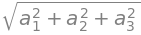

In [13]:
sqrt(a_I.dot(a_I))

Now how about the cross product?  To do cross products as matrix operations, we need to define a new thing, called the **cross-product equivalent matrix**:
$$[\mf a\times]_{\mc I} \triangleq \begin{bmatrix}
0 & -a_3 & a_2\\
a_3 & 0 & -a_1\\
-a_2 & a_1 & 0
\end{bmatrix}_\mc I $$

If $A$ is a skew-symmetric matrix then $A^T = -A$, i.e., a skew-symmetric matrix is one whose transpose equals its negative.  The negative of a matrix should be understood as multiplying the matrix by -1, which is equivalent to flipping the sign of every matrix element.  Since the transpose operator does not modify the contents of the diagonal of a matrix, this definition is telling us that the diagonal elements of a skew-symmetric matrix must equal their own negative values.  The only real number for which this is true is zero, and so every skew-symmetric matrix must have zeros all along the diagonal.  The off-diagonal elements must be symmetric, with opposite signs.  

Notice that we can flip the signs on all of the elements in our cross-product equivalent matrix and still get a valid skew-symmetric matrix (i.e., the first row could be 0, $a_3$, $-a_2$, etc.).  So why prefer this version?  This is how the cross-product equivalent matrix encodes the right-hand rule!  If we were to flip the signs, we would be switching to a left-handed convention.  We'll return to this in a while, but do keep it in mind. 

sympy doesn't provide a skew-symmetric operator, but this book does, so let's try it out:

In [14]:
skew(a_I)

⎡ 0   -a₃  a₂ ⎤
⎢             ⎥
⎢a₃    0   -a₁⎥
⎢             ⎥
⎣-a₂  a₁    0 ⎦

Having defined the cross-product equivalent matrix, we can now provide a linear algebraic definition of the cross product:
<div class="alert alert-block alert-info">
$$[\mf a \times \mf b]_\mc I = [\mf a \times]_\mc I [\mf b]_\mc I $$
</div>

Interesting.  Let's give it a shot.

In [15]:
# this should result in the cross product of a and b in I frame components:
skew(a_I)*b_I

⎡a₂⋅b₃ - a₃⋅b₂ ⎤
⎢              ⎥
⎢-a₁⋅b₃ + a₃⋅b₁⎥
⎢              ⎥
⎣a₁⋅b₂ - a₂⋅b₁ ⎦

Remember, the output is a vector with components in the same frame as the inputs. Let's remind ourselves of this by making it explicit:

$[\mf a \times \mf b]_\mc I = $

In [16]:
mat2vec(skew(a_I)*b_I)

The evaluation of the cross product is frequently taught as taking the determinant of a matrix whose first row consists of the basis elements of the reference frame and the second and third rows are the components of the two vectors whose cross product is being evaluated.  Let's see if we can reproduce this:

In [17]:
e1,e2,e3 = symbols('\mathbf{\hat{e}}_1, \mathbf{\hat{e}}_2, \mathbf{\hat{e}}_3')
# 2D matrices are defined as arrays of arrays (or lists of lists):
cross_product_matrix = Matrix([[e1, e2, e3], [a1, a2, a3], [b1, b2,b3]])
cross_product_matrix

⎡\mathbf{\hat{e}}₁  \mathbf{\hat{e}}₂  \mathbf{\hat{e}}₃⎤
⎢                                                       ⎥
⎢       a₁                 a₂                 a₃        ⎥
⎢                                                       ⎥
⎣       b₁                 b₂                 b₃        ⎦

In [18]:
# Now let's carry out the determinant:
cross_product_matrix.det() # this is sympy's determinant operator

Did we get the right answer?  It's a bit hard to tell because the expression above is not simplified.  Fortunately, sympy provides us with a method of collecting terms called (conveniently) collect:

In [19]:
collect(cross_product_matrix.det(), (e1,e2,e3))

By George, I think we've got it.

Of course, sympy has a built-in cross product method as well.  Let's see if it does the same thing:

In [20]:
a_I.cross(b_I)

⎡a₂⋅b₃ - a₃⋅b₂ ⎤
⎢              ⎥
⎢-a₁⋅b₃ + a₃⋅b₁⎥
⎢              ⎥
⎣a₁⋅b₂ - a₂⋅b₁ ⎦

Visual inspection of simple matrices is fine, but sometimes we want a more systematic comparison.  What if we just subtracted the two cross product results?  If they match, we should get back a matrix of zeros, right? Let's see:

In [21]:
skew(a_I)*b_I - a_I.cross(b_I)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Fantastic! So many new toys to play with.  Let's see if we can nail down our understanding of the commutative properties of the cross product. So far we've been looking at $\mf a \times \mf b$ but now let's consider $\mf b \times \mf a$:

In [22]:
# this is b cross a in I frame components:
skew(b_I)*a_I

⎡-a₂⋅b₃ + a₃⋅b₂⎤
⎢              ⎥
⎢a₁⋅b₃ - a₃⋅b₁ ⎥
⎢              ⎥
⎣-a₁⋅b₂ + a₂⋅b₁⎦

We expect this to equal $-(\mf a \times \mf b)$.  We verify by *adding* the two results, again expecting all zeros:

In [23]:
skew(b_I)*a_I + skew(a_I)*b_I

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Finally, let's confirm our previously posited behavior of the standard basis.

In [24]:
#e_1 crossed with e_2 should result in e_3
mat2vec(skew(e_1_I)*e_2_I)

In [25]:
#e_2 crossed with e_3 should result in e_1
mat2vec(skew(e_2_I)*e_3_I)

In [26]:
# Now, show that e_3 crossed with e_2 should result in -e_1




## Triple Products

Now that we have fully defined the dot and cross products, we can start mixing and matching them to create triple products (i.e., combinations of two vector products).  

### Scalar Triple Product

Given three Euclidean vectors $\mf a, \mf b$, and $\mf c$, the scalar triple product is defined as $\mf a \cdot (\mf b \times \mf c)$. The absolute value of this quantity (a scalar value) is equivalent to the volume of the parallelepiped defined by the three vectors.  The scalar triple product is invariant under a circular shift of the two operators.  That is:

<div class="alert alert-block alert-info">
$$\mf a \cdot (\mf b \times \mf c) = \mf b \cdot (\mf c \times \mf a) = \mf c \cdot (\mf a \times \mf b) $$
</div>

Let's confirm:

In [27]:
c1,c2,c3 = symbols("c_1, c_2, c_3")
# set up the component representation of the new c vector
c_I = Matrix([c1,c2,c3]) #the _I is to remind us of which frame we're using

#evaluate the three versions of the triple product
a_I.dot(b_I.cross(c_I)), b_I.dot(c_I.cross(a_I)),c_I.dot(a_I.cross(b_I))

In [28]:
#and confirm that they're actually the same:
simplify(a_I.dot(b_I.cross(c_I)) -  b_I.dot(c_I.cross(a_I))), simplify(a_I.dot(b_I.cross(c_I)) -  c_I.dot(a_I.cross(b_I)))

Note the use of the sympy simplify function to ensure that we are fully algebraically simplifying the difference expressions.

The scalar triple product can equivalently be represented by the determinant of the matrix whose rows are the components of the three vectors:

In [29]:
# define the matrix
tripleproductmatrix = Matrix([[a1,a2,a3],[b1,b2,b3],[c1,c2,c3]])
tripleproductmatrix

⎡a₁  a₂  a₃⎤
⎢          ⎥
⎢b₁  b₂  b₃⎥
⎢          ⎥
⎣c₁  c₂  c₃⎦

In [30]:
# carry out the determinant
tripleproductmatrix.det()

In [31]:
# and to verify that this produces the same result:
simplify(tripleproductmatrix.det() - a_I.dot(b_I.cross(c_I)))

### Vector Triple Product

We can define a second triple product via the application of two cross products.  This vector cross product has the form:

<div class="alert alert-block alert-info">
$$ \mf a \times (\mf b \times \mf c) = \mf b (\mf a \cdot \mf c) - \mf c \left( \mf a \cdot \mf b\right) $$
</div>

A useful mnemonic for this product is "back - cab" (stare at the equation until that makes sense). Remember that the placement of parentheses is incredibly important here.  The vector formed by $(\mf a \times \mf b) \times \mf c$ is completely different from the one given by $\mf a \times (\mf b \times \mf c)$.  We can use the expression above to evaluate this alternate form (taking into account the anti-commutative nature of the cross product):

<div class="alert alert-block alert-info">
$$ (\mf a \times \mf b) \times \mf c = -\mf c \times (\mf a \times \mf b) = -\mf a (\mf c \cdot \mf b) + \mf b \left( \mf c \cdot \mf a\right) $$
</div>

Note that the first version is the one that arises most frequently in our derivations, although the second version makes an occassional appearance as well. 

Let's verify all this:

In [32]:
# compare the two sides of the vector triple product expression:
simplify(a_I.cross(b_I.cross(c_I)) - (b_I*a_I.dot(c_I) - c_I*(a_I.dot(b_I))))

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [33]:
# now you verify the second expression:



# Tensors and Outer Products

You may have noticed that we started our [vector products discussion](#Vector-Products) by stating that we were going to be introducing three different vector products, but we ended up only discussing two.  That's because the third type of vector product requires us to first introduce the concept of **tensors**. Unlike our foray into the fabulous world of vectors, tensors are not directly motivated by Newton's laws.  However, as we continue working our way on a firm mathematical description of these laws, and the exploration of their caveats and implications, we will find tensor formalism enormously helpful.

Tensors can be thought of as a generalization of vectors that allow us to encode multilinear relationships between elements of vector spaces.  The core new concept that we need to add to our toolkit when it comes to tensors is **tensor rank**. The tensor rank (or order) describes the dimensionality of the array of scalars needed to describe the components of a tensor in some basis (reference frame).  So, a rank-0 tensor is a scalar.  A rank-1 tensor is a vector, whose components in some frame are encoded as a 1-D array (or column matrix). A rank-2 tensor, sometimes called a **dyadic**, has components that can be encoded as a 2-D array (or matrix). For our purposes, we will primarily be dealing with rank-2 tensors associated with the Euclidean vector space, with components encoded as 3x3 matrices. 

<div class="alert alert-block alert-danger">
    In various contexts, what we're calling rank here may be referred to as <b>order</b> or <b>dimensionality</b>, with order being the preferred nomenclature in many texts.  We reserve 'dimensionality' to describe the dimension of the associated vector space (almost always $\mb R^3$ for us).  Some people insist that 'order' should always be used instead of 'rank' because matrix rank has a very specific (and different) definition in linear algebra (the number of linearly independent rows/columns in the matrix), but tensors are <i>not</i> matrices, and so we are comfortable using 'rank' in this context. Plus, it's fun to piss off mathematicians.
</div>

So how do we get at these tensors? The answer turns out to be: indirectly.  We're going to posit a basis for the tensors based on the **outer product** (or tensor product) operator ($\otimes$), and develop our understanding of these two concepts jointly.

<div class="alert alert-block alert-info">
   Given a basis set (reference frame) $\mc I = (\bhat{e}_1, \bhat{e}_2, \bhat{e}_3)$, the rank-2 tensor basis is given by the set of outer products $\{\bhat{e}_i \otimes \bhat{e}_j\}$ for $i,j=1,2,3$.  This basis set therefore has 9 elements.
</div>
A rank-2 tensor (dyadic) $\mb T$ can be defined as the outer product of two vectors $\mf a$ and $\mf b$, such that: $\mb T \triangleq \mf a\otimes \mf b$.  Recall that $\mf a$ and $\mf b$ can be expressed as weighted sums of basis elements:
$$\mf a = \sum_i a_i \bhat e_i \quad \mathrm{and} \quad \mf b = \sum_i b_i \bhat e_i $$
The tensor can equivalently be decomposed into components in a tensor basis:
<div class="alert alert-block alert-info">
   $$  \mb T = \mf a \otimes \mf b \triangleq \sum_{i} \sum_{j} T_{ij} \left(\bhat e_i \otimes \bhat e_j\right) $$
</div>
where $T_{ij}$ are the component weights (measure numbers) of the tensor in frame $\mc I$. Note that we are typesetting the tensor in a blackboard font ($\mb T$).  We will maintain this notational convention from here on out. 

<div class="alert alert-block alert-info">
    Given geometric vectors $\mf a, \mf b, \mf c$, and scalars $x$, the tensor outer product is:<br>
<ol>
    <li> Distributive over vector addition:$ (\mf a+ \mf b) \otimes \mf c = \mf a \otimes \mf c + \mf b \otimes \mf c$ and $\mf c \otimes (\mf a+ \mf b) = \mf c \otimes \mf a + \mf c \otimes \mf b$</li>
    <li> Associative: $(\mf a \otimes \mf b) \otimes \mf c = \mf a \otimes ( \mf b \otimes \mf c)$</li>
    <li> Compatible with scalar multiplication: $x(\mf a \otimes \mf b) = (x\mf a) \otimes \mf b = \mf a \otimes (x\mf b)$</li>
</ol>
</div>

The operation of the outer product is, in some sense, the opposite of that of the inner product, as it is rank-increasing. Just as we represent vector components in some frame as (column) matrices and vector products as linear algebraic operations on these matrices, so can we represent tensor components and tensor products.  Given:
$$\left[\mf a\right]_\mc I =\begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}_\mc I	\hspace{30pt}  \left[\mf b\right]_\mc I =\begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}_\mc I \hspace{22pt} \left[ \mathbb T \right]_\mc I = \begin{bmatrix} T_{11} & T_{12} & T_{13} \\
T_{21} & T_{22} & T_{23} \\
T_{31} & T_{32} & T_{33}\end{bmatrix}_\mc I$$
the outer product $\mb T = \mf a \otimes \mf b$ can be written in component form as:
<div class="alert alert-block alert-info">
$$[\mb T]_\mc I = [\mf a \otimes \mf b]_\mc I = [\mf a]_\mc I [\mf b]_\mc I^T= \begin{bmatrix} a_1 b_1 & a_1 b_2 & a_1 b_3 \\
 a_2 b_1 & a_2 b_2 & a_2 b_3 \\
 a_3 b_1 & a_3 b_2 & a_3 b_3\end{bmatrix}_\mc I$$
</div>


The dot product that we developed for geometric vectors can be applied equivalently to tensors, save that a dot product between a tensor and a vector will not return a scalar.  Remember that the dot product is an inner product, which means that it is rank-reducing. The dot product between two vectors (rank-1 tensors) produces a scalar. The dot product between a dyadic and a vector produces another vector. So, in the same way that we previously found that $a_i = \mf a \cdot \bhat e_i$ and   $b_i = \mf b \cdot \bhat e_i$ (for the $\mf a$ and $\mf b$ definitions given above), we can equivalently write:

<div class="alert alert-block alert-info">
$$T_{ij} = \bhat e_i \cdot \mb T \cdot \bhat e_j = a_ib_j$$
</div>

which matches exactly our understanding of the component representation we get from the outer produce evaluation. Note that this operation (dotting the tensor with two basis vectors to get the component weight) is not commutative, since we cannot first dot the two unit vectors together, or we would be left with just the original tensor multiplied by the identity scalar. In general, the dot product of a vector with a dyadic is **not** commutative.

<div class="alert alert-block alert-info">
Given Euclidean vectors $\mf a, \mf b, \mf c$:
$$\mf c \cdot (\mf a\otimes \mf b) = (\mf c \cdot \mf a)\mf b$$
$$(\mf a\otimes \mf b)\cdot \mf c = (\mf b \cdot \mf c)\mf a$$
</div>

We know how to carry out the operations on the right-hand sides of these expressions in component form, so let's take a look at what they look like:

In [49]:
left_dot_product = c_I.dot(a_I)*b_I
expand(left_dot_product) # using the sympy expand command to distribute the b components over the multiplication

⎡a₁⋅b₁⋅c₁ + a₂⋅b₁⋅c₂ + a₃⋅b₁⋅c₃⎤
⎢                              ⎥
⎢a₁⋅b₂⋅c₁ + a₂⋅b₂⋅c₂ + a₃⋅b₂⋅c₃⎥
⎢                              ⎥
⎣a₁⋅b₃⋅c₁ + a₂⋅b₃⋅c₂ + a₃⋅b₃⋅c₃⎦

In [52]:
right_dot_product = b_I.dot(c_I)*a_I
expand(right_dot_product) 

⎡a₁⋅b₁⋅c₁ + a₁⋅b₂⋅c₂ + a₁⋅b₃⋅c₃⎤
⎢                              ⎥
⎢a₂⋅b₁⋅c₁ + a₂⋅b₂⋅c₂ + a₂⋅b₃⋅c₃⎥
⎢                              ⎥
⎣a₃⋅b₁⋅c₁ + a₃⋅b₂⋅c₂ + a₃⋅b₃⋅c₃⎦

Ok, clearly these two results are different, but what about the left-hand side?  Let's posit a linear algebraic form for the vector-dyadic dot product, and see if we can get things to be internally consistent. 
<div class="alert alert-block alert-info">
$$[\mf c\cdot \mb T]_{\mc I} = \left([\mf c]_{\mc I}^T [\mb T]_\mc I\right)^T =  [\mb T]_\mc I^T[\mf c]_{\mc I} \\ [\mb T \cdot \mf c]_{\mc I} = [\mb T]_{\mc I} [\mf c]_{\mc I}$$
</div>
In the first case, we use exactly the same form as we did for the dot product operation between two vectors, but introduce the overall transpose in order for the output to remain a column matrix. In the second case, we rely on the dimensionality of the system to get us the behavior we want.  Let's apply this to the same two dot products as before:

In [54]:
T_I = a_I*b_I.transpose()
T_I

⎡a₁⋅b₁  a₁⋅b₂  a₁⋅b₃⎤
⎢                   ⎥
⎢a₂⋅b₁  a₂⋅b₂  a₂⋅b₃⎥
⎢                   ⎥
⎣a₃⋅b₁  a₃⋅b₂  a₃⋅b₃⎦

In [58]:
left_dot_product2 = T_I.transpose()*c_I
right_dot_product2 = T_I*c_I
left_dot_product2, right_dot_product2

⎛⎡a₁⋅b₁⋅c₁ + a₂⋅b₁⋅c₂ + a₃⋅b₁⋅c₃⎤  ⎡a₁⋅b₁⋅c₁ + a₁⋅b₂⋅c₂ + a₁⋅b₃⋅c₃⎤⎞
⎜⎢                              ⎥  ⎢                              ⎥⎟
⎜⎢a₁⋅b₂⋅c₁ + a₂⋅b₂⋅c₂ + a₃⋅b₂⋅c₃⎥, ⎢a₂⋅b₁⋅c₁ + a₂⋅b₂⋅c₂ + a₂⋅b₃⋅c₃⎥⎟
⎜⎢                              ⎥  ⎢                              ⎥⎟
⎝⎣a₁⋅b₃⋅c₁ + a₂⋅b₃⋅c₂ + a₃⋅b₃⋅c₃⎦  ⎣a₃⋅b₁⋅c₁ + a₃⋅b₂⋅c₂ + a₃⋅b₃⋅c₃⎦⎠

Wunderbar! At the very least, our vector and linear algebra definitions of these operations are self-consistent.  Let's see if we can get a bit more consistency by replacing all instances of $a_ib_j$ with $T_{ij}$.

In [59]:
T_I2 = fancyMat('T',(3,3)) # fancyMat is our method for generating indexed matrices.
T_I2

⎡T_{11}  T_{12}  T_{13}⎤
⎢                      ⎥
⎢T_{21}  T_{22}  T_{23}⎥
⎢                      ⎥
⎣T_{31}  T_{32}  T_{33}⎦

In [88]:
# We're going to make a dictionary of equivalent terms to use for substitution
subdict = {}
for ii,jj in zip(T_I, T_I2): subdict[ii] = jj
# As a check, we apply this to the a_i b_j version of the T matrix, and expect to get the T_{ij} version:
T_I.subs(subdict)

⎡T_{11}  T_{12}  T_{13}⎤
⎢                      ⎥
⎢T_{21}  T_{22}  T_{23}⎥
⎢                      ⎥
⎣T_{31}  T_{32}  T_{33}⎦

In [91]:
# now let's apply this to the left and right dot product results:
expand(left_dot_product).subs(subdict), expand(right_dot_product).subs(subdict)

⎛⎡T_{11}⋅c₁ + T_{21}⋅c₂ + T_{31}⋅c₃⎤  ⎡T_{11}⋅c₁ + T_{12}⋅c₂ + T_{13}⋅c₃⎤⎞
⎜⎢                                 ⎥  ⎢                                 ⎥⎟
⎜⎢T_{12}⋅c₁ + T_{22}⋅c₂ + T_{32}⋅c₃⎥, ⎢T_{21}⋅c₁ + T_{22}⋅c₂ + T_{23}⋅c₃⎥⎟
⎜⎢                                 ⎥  ⎢                                 ⎥⎟
⎝⎣T_{13}⋅c₁ + T_{23}⋅c₂ + T_{33}⋅c₃⎦  ⎣T_{31}⋅c₁ + T_{32}⋅c₂ + T_{33}⋅c₃⎦⎠

In [92]:
# Finally, let's check this against the component definitions of these dot products:
T_I2.transpose()*c_I, T_I2*c_I

⎛⎡T_{11}⋅c₁ + T_{21}⋅c₂ + T_{31}⋅c₃⎤  ⎡T_{11}⋅c₁ + T_{12}⋅c₂ + T_{13}⋅c₃⎤⎞
⎜⎢                                 ⎥  ⎢                                 ⎥⎟
⎜⎢T_{12}⋅c₁ + T_{22}⋅c₂ + T_{32}⋅c₃⎥, ⎢T_{21}⋅c₁ + T_{22}⋅c₂ + T_{23}⋅c₃⎥⎟
⎜⎢                                 ⎥  ⎢                                 ⎥⎟
⎝⎣T_{13}⋅c₁ + T_{23}⋅c₂ + T_{33}⋅c₃⎦  ⎣T_{31}⋅c₁ + T_{32}⋅c₂ + T_{33}⋅c₃⎦⎠

Absolutely beautiful!